In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df = df.dropna()

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

df["Customer_Tenure"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

In [ ]:
features = [
    "Income", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases",
    "NumWebVisitsMonth", "Customer_Tenure"
]

X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

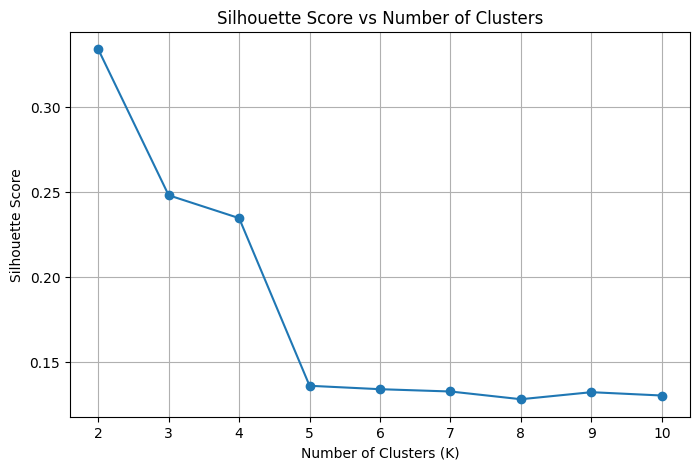

In [ ]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        max_iter=300,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

In [ ]:
best_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", best_k)

Optimal number of clusters: 2


In [ ]:
kmeans_final = KMeans(
    n_clusters=best_k,
    init="k-means++",
    n_init=30,
    max_iter=300,
    random_state=42
)

df["Cluster"] = kmeans_final.fit_predict(X_scaled)

In [ ]:
cluster_summary = df.groupby("Cluster")[features].mean()
cluster_summary

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Tenure
Cluster,,,,,,,,,,,,,,
0,39120.672131,48.678092,111.249627,6.298808,37.591654,9.448584,6.526826,22.487332,2.520119,2.991058,0.924739,3.976155,6.403130,336.647541
1,72402.708238,49.526316,602.729977,57.153318,365.692220,80.921053,58.509153,76.943936,2.021739,5.765446,5.352403,8.602975,3.654462,379.430206


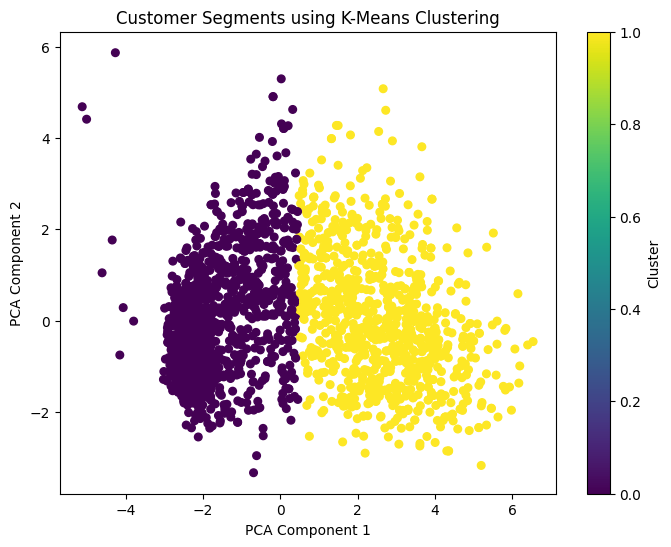

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis", s=30)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments using K-Means Clustering")
plt.colorbar(label="Cluster")
plt.show()

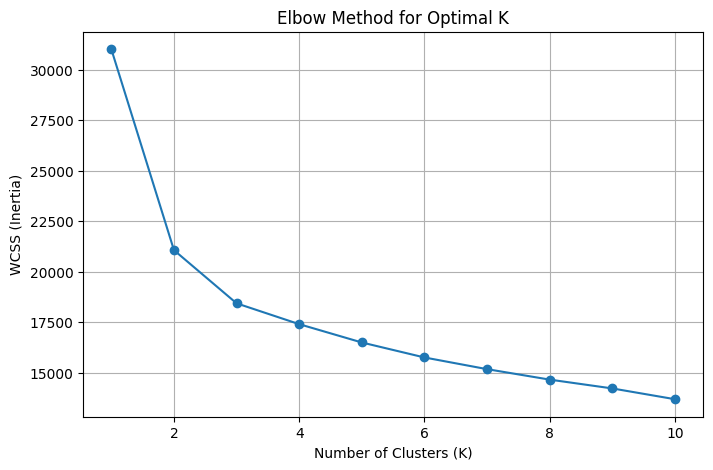

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        random_state=42
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


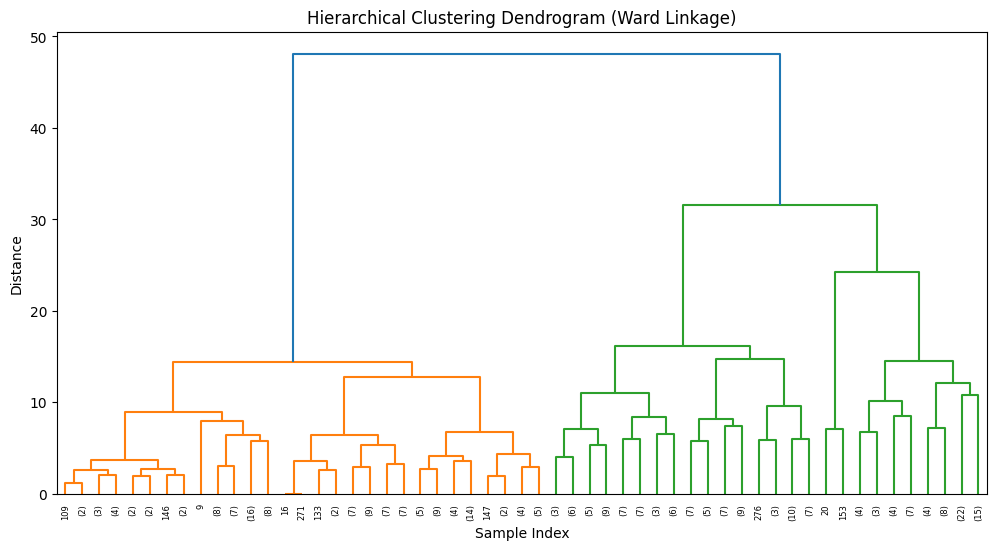

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use a subset to keep it readable
sample = X_scaled[:300]

linked = linkage(sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


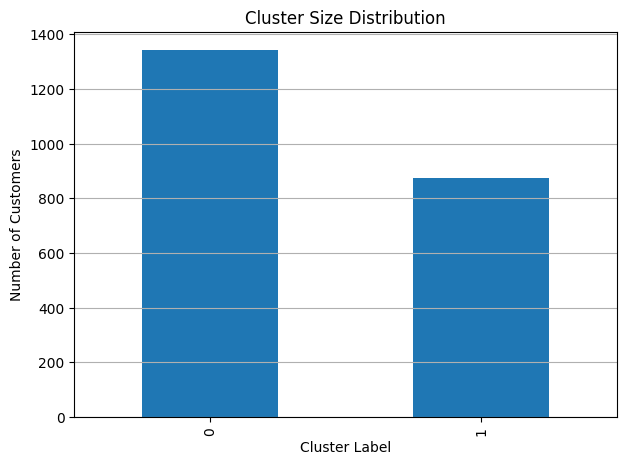

In [ ]:
cluster_counts = df["Cluster"].value_counts().sort_index()

plt.figure(figsize=(7, 5))
cluster_counts.plot(kind="bar")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Customers")
plt.title("Cluster Size Distribution")
plt.grid(axis="y")
plt.show()


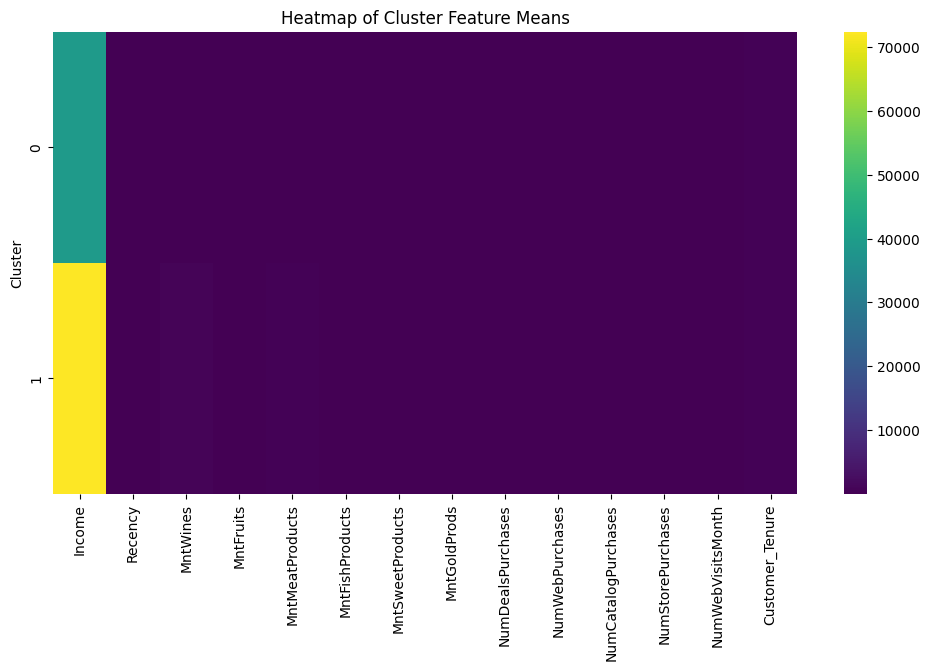

In [ ]:
cluster_means = df.groupby("Cluster")[features].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="viridis", annot=False)
plt.title("Heatmap of Cluster Feature Means")
plt.show()


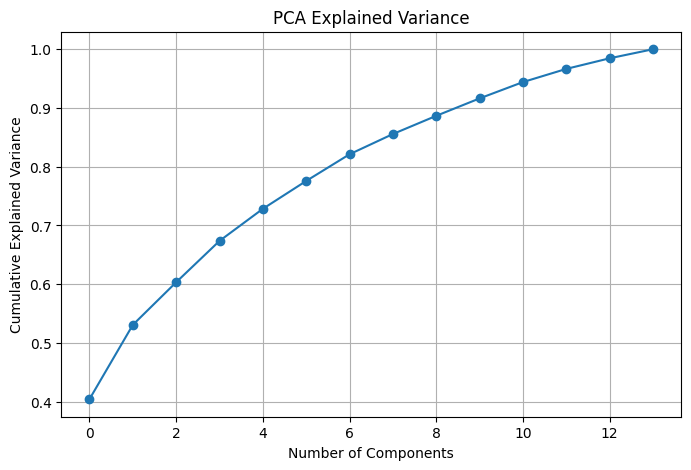

In [ ]:
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()
